# Introduction to Pandas DataFrame

```DataFrame ``` is a 2-dimensional labeled data structure with columns of potentially ```different types.```

df :
* dict of 1-D array
* 2-D numpy array
* SQL table
* Excel chartsheet

* having index(row) and colulmns(columns)

In [1]:
import pandas as pd
import numpy as np

In [2]:
dict_ = {
    "col_1" : np.array([1,6,90,12,32,6]),
    "col_2" : np.arange(6,12)
}

df = pd.DataFrame(dict_)     # create a df from dict
df

,col_1,col_2
0,1,6
1,6,7
2,90,8
3,12,9
4,32,10
5,6,11


In [8]:
df = pd.DataFrame(dict_, index=list("ABCDEF"))
df

,col_1,col_2
A,1,6
B,6,7
C,90,8
D,12,9
E,32,10
F,6,11


In [4]:
df.index

Index(['A', 'B', 'C', 'D', 'E', 'F'], dtype='object')

In [5]:
df.columns

Index(['col_1', 'col_2'], dtype='object')

In [7]:
# df = pd.DataFrame(dict_, index=list("ABCDEF"), columns=["first_col", "second_col"])
# df

In [9]:
data = np.zeros((2,), dtype=[("A", "i4"), ("B", "f4"), ("C", "a10")])
data

array([(0, 0., b''), (0, 0., b'')],
      dtype=[('A', '<i4'), ('B', '<f4'), ('C', 'S10')])

In [10]:
pd.DataFrame(data)

,A,B,C
0,0,0.0,b''
1,0,0.0,b''


From a list of dicts

In [11]:
data = [{"a": 1, "b": 2}, {"a": 5, "b": 10, "c": 20}]
data

[{'a': 1, 'b': 2}, {'a': 5, 'b': 10, 'c': 20}]

In [12]:
type(data)

list

In [13]:
pd.DataFrame(data)

,a,b,c
0,1,2,NaN
1,5,10,20.0


from Pandas Series

In [14]:
data = {
    "one": pd.Series([1.0, 2.0, 3.0], index=["a", "b", "c"]),
    "two": pd.Series([1.0, 2.0, 3.0, 4.0], index=["a", "b", "c", "d"]),
}

pd.DataFrame(data)

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [15]:
pd.DataFrame(data, index=["d", "b", "a"])

,one,two
d,NaN,4.0
b,2.0,2.0
a,1.0,1.0


In [16]:
pd.DataFrame(data, index=["d", "b", "a"], columns=["two", "three"])

,two,three
d,4.0,NaN
b,2.0,NaN
a,1.0,NaN


## pd.DataFrame.from_dict()

In [17]:
pd.DataFrame.from_dict(dict([("A", [1, 2, 3]), ("B", [4, 5, 6])]))

,A,B
0,1,4
1,2,5
2,3,6


If you pass ```orient='index'``` , the keys will be the row labels. In this case, you can also pass the desired column names:

In [18]:
pd.DataFrame.from_dict(dict([("A", [1, 2, 3]), ("B", [4, 5, 6])]),
                       orient="index",
                       columns=["col_1","col_2","col_3"])

,col_1,col_2,col_3
A,1,2,3
B,4,5,6


## Column selection, addition, deletion

In [19]:
df

,col_1,col_2
A,1,6
B,6,7
C,90,8
D,12,9
E,32,10
F,6,11


In [20]:
df["col_1"]

A     1
B     6
C    90
D    12
E    32
F     6
Name: col_1, dtype: int64

In [21]:
df["col_3"] = df["col_1"] * df["col_2"]
df["col_3"]

A      6
B     42
C    720
D    108
E    320
F     66
Name: col_3, dtype: int64

In [22]:
df["flag"] = df["col_3"] > 100
df["flag"]

A    False
B    False
C     True
D     True
E     True
F    False
Name: flag, dtype: bool

In [23]:
df

,col_1,col_2,col_3,flag
A,1,6,6,False
B,6,7,42,False
C,90,8,720,True
D,12,9,108,True
E,32,10,320,True
F,6,11,66,False


**Columns can be deleted or popped like with a dict :**

```del_col = df.pop("col_name")   or del df["col_name"]```

In [24]:
del df["col_2"]   # delete 2nd column of df

In [25]:
df

,col_1,col_3,flag
A,1,6,False
B,6,42,False
C,90,720,True
D,12,108,True
E,32,320,True
F,6,66,False


In [26]:
three = df.pop("col_3")
three

A      6
B     42
C    720
D    108
E    320
F     66
Name: col_3, dtype: int64

In [27]:
df

,col_1,flag
A,1,False
B,6,False
C,90,True
D,12,True
E,32,True
F,6,False


In [28]:
type(three)

pandas.core.series.Series

Inserting column :

In [29]:
df["new_col"] = "new"
df

,col_1,flag,new_col
A,1,False,new
B,6,False,new
C,90,True,new
D,12,True,new
E,32,True,new
F,6,False,new


add a column -- with only few rows rest are nan -- we can say": truncated_column

In [30]:
df["trunc_col"] = df["col_1"][:2]
df

,col_1,flag,new_col,trunc_col
A,1,False,new,1.0
B,6,False,new,6.0
C,90,True,new,NaN
D,12,True,new,NaN
E,32,True,new,NaN
F,6,False,new,NaN


```By default, columns get inserted at the end.```

```DataFrame.insert()``` **inserts at a particular location in the columns :**

```df.insert(col_index_position, "new_col_name", data_which_should_be_inserted)```

In [31]:
df.insert(1, "bar", df["col_1"])
df

,col_1,bar,flag,new_col,trunc_col
A,1,1,False,new,1.0
B,6,6,False,new,6.0
C,90,90,True,new,NaN
D,12,12,True,new,NaN
E,32,32,True,new,NaN
F,6,6,False,new,NaN


Using ``` assign() ``` method

DataFrame has an ```assign()``` method that allows you to easily create new columns that are potentially derived from existing columns.

In [32]:
import seaborn as sns

In [33]:
iris = sns.load_dataset("iris")

In [34]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [36]:
iris.assign(sepal_ratio=iris["sepal_width"] / iris["sepal_length"]).head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_ratio
0,5.1,3.5,1.4,0.2,setosa,0.686275
1,4.9,3.0,1.4,0.2,setosa,0.612245
2,4.7,3.2,1.3,0.2,setosa,0.680851
3,4.6,3.1,1.5,0.2,setosa,0.673913
4,5.0,3.6,1.4,0.2,setosa,0.720000


In [37]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [40]:
iris.assign(sepal_ratio=lambda x: (x["sepal_width"] / x["sepal_length"])).head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_ratio
0,5.1,3.5,1.4,0.2,setosa,0.686275
1,4.9,3.0,1.4,0.2,setosa,0.612245
2,4.7,3.2,1.3,0.2,setosa,0.680851
3,4.6,3.1,1.5,0.2,setosa,0.673913
4,5.0,3.6,1.4,0.2,setosa,0.720000


lambda x: (x["sepal_width"] / x["sepal_length"]): This is a lambda function that takes an input x, which represents each row of the DataFrame.

```assign() always returns a copy of the data, leaving the original DataFrame untouched.```

<Axes: xlabel='sepal_ratio', ylabel='petal_ratio'>

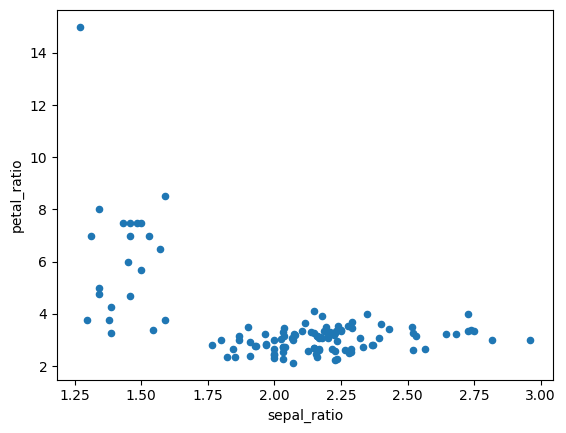

In [45]:
iris.query("sepal_length > 5").assign(
    sepal_ratio = lambda x : x["sepal_length"] /x.sepal_width ,
    petal_ratio = lambda x : x.petal_length / x.petal_width,
).plot(kind = "scatter", x = "sepal_ratio", y = "petal_ratio")

```When doing an operation between DataFrame and Series, the default behavior is to align the Series index on the DataFrame columns, thus broadcasting row-wise. ```

* df - df.iloc[0]
* 

```Arithmetic operations with scalars operate element-wise:```

* df * 5 + 2
* 1 / df
* df ** 4

```Boolean operators operate element-wise as well:```

In [47]:
df1 = pd.DataFrame({"a": [1, 0, 1], "b": [0, 1, 1]}, dtype=bool)

df2 = pd.DataFrame({"a": [0, 1, 1], "b": [1, 1, 0]}, dtype=bool)

df1

,a,b
0,True,False
1,False,True
2,True,True


In [48]:
df2

,a,b
0,False,True
1,True,True
2,True,False


In [49]:
df1 & df2

,a,b
0,False,False
1,False,True
2,True,False


In [50]:
df1 | df2

,a,b
0,True,True
1,True,True
2,True,True


In [52]:
df1 ^ df2

,a,b
0,True,True
1,True,False
2,False,True


In [53]:
~df1

,a,b
0,False,True
1,True,False
2,False,False


In [54]:
-df1

,a,b
0,False,True
1,True,False
2,False,False


## DataFrame interoperability with NumPy functions

In [58]:
df = pd.DataFrame.from_dict(dict([("A", [1, 2, 3]), ("B", [4, 5, 6])]))
df

,A,B
0,1,4
1,2,5
2,3,6


In [59]:
np.exp(df)

,A,B
0,2.718282,54.598150
1,7.389056,148.413159
2,20.085537,403.428793


In [60]:
df.to_numpy()

array([[1, 4],
       [2, 5],
       [3, 6]])

In [61]:
np.asarray(df)

array([[1, 4],
       [2, 5],
       [3, 6]])

## Console display

A very large DataFrame will be truncated to display them in the console.

In [62]:
print(iris)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


In [64]:
from rdatasets import data

# Load the baseball dataset from the plyr R package
baseball = data('baseball')

# Convert the dataset to a Pandas DataFrame
baseball_df = pd.DataFrame(baseball)

# Display the first few rows of the DataFrame
print(baseball_df.head())

Could not read datasets/baseball
Which item did you mean: ['uspop', 'OrchardSprays', 'quakes', 'ToothGrowth', 'DNase', 'pressure', 'lynx', 'Harman74', 'iris3', 'ChickWeight', 'co2', 'airmiles', 'USAccDeaths', 'mtcars', 'sleep', 'USPersonalExpenditure', 'Orange', 'crimtab', 'freeny', 'austres', 'longley', 'precip', 'sunspot', 'Loblolly', 'presidents', 'ability', 'VADeaths', 'USJudgeRatings', 'occupationalStatus', 'WWWusage', 'anscombe', 'Puromycin', 'Indometh', 'LakeHuron', 'BOD', 'swiss', 'esoph', 'Harman23', 'UKDriverDeaths', 'rivers', 'discoveries', 'lh', 'attenu', 'Formaldehyde', 'Seatbelts', 'trees', 'EuStockMarkets', 'randu', 'attitude', 'AirPassengers', 'morley', 'USArrests', 'chickwts', 'treering', 'Nile', 'Theoph', 'airquality', 'PlantGrowth', 'LifeCycleSavings', 'InsectSprays', 'islands', 'rock', 'stackloss', 'sunspots', 'UKgas', 'nottem', 'euro', 'volcano', 'faithful', 'iris', 'HairEyeColor', 'BJsales', 'Titanic', 'infert', 'women', 'UCBAdmissions', 'cars', 'nhtemp', 'Johnson

In [65]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


However, using ```DataFrame.to_string()``` will return a string representation of the DataFrame in tabular form, though it won’t always fit the console width:

In [67]:
print(iris.iloc[-20: ,:].to_string())

     sepal_length  sepal_width  petal_length  petal_width    species
130           7.4          2.8           6.1          1.9  virginica
131           7.9          3.8           6.4          2.0  virginica
132           6.4          2.8           5.6          2.2  virginica
133           6.3          2.8           5.1          1.5  virginica
134           6.1          2.6           5.6          1.4  virginica
135           7.7          3.0           6.1          2.3  virginica
136           6.3          3.4           5.6          2.4  virginica
137           6.4          3.1           5.5          1.8  virginica
138           6.0          3.0           4.8          1.8  virginica
139           6.9          3.1           5.4          2.1  virginica
140           6.7          3.1           5.6          2.4  virginica
141           6.9          3.1           5.1          2.3  virginica
142           5.8          2.7           5.1          1.9  virginica
143           6.8          3.2    

We can change how much to print on a single row by setting the ```display.width``` option:

In [78]:
pd.set_option("display.width", 40)  # default is 80
pd.DataFrame(np.random.randn(3, 20))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-1.077227,-0.208303,0.445229,1.967493,-0.763355,-0.313892,0.622726,-0.703481,2.378464,-0.315785,1.312651,-1.135334,-0.078967,-0.042679,-0.747797,0.958330,-0.504109,0.189155,-0.492549,-0.480141
1,0.543539,0.533091,-0.884199,-0.900584,0.506981,-0.349102,-0.321152,0.191307,-0.432344,-0.118537,-1.145232,-0.553764,-0.549921,0.443620,1.404256,0.628465,-1.252791,-0.773808,0.023056,-1.354272
2,0.275046,0.968019,0.246539,-0.679693,-0.850597,0.699745,0.170298,0.541365,-0.004551,0.283832,0.436851,0.128991,1.050483,0.538725,-0.301767,0.295945,-0.786610,0.786050,0.246034,0.292796


In [76]:
pd.DataFrame(np.random.randn(3, 20))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-1.127470,1.593732,-0.767960,-0.126001,-0.064494,-0.267652,-0.207111,-2.615337,-0.099234,-0.213294,-1.564452,1.991528,1.076178,-1.041904,0.739149,1.837436,1.929411,-0.797397,-0.194419,-0.005154
1,-0.493882,-1.489295,-0.715954,0.708953,-1.277313,-1.491230,-0.847488,-0.214110,-0.233783,0.209294,1.383409,0.182303,-0.222175,-0.440930,0.246427,1.334371,0.817839,-0.101385,-1.218503,0.130275
2,1.419592,1.242658,-1.895119,-0.376855,-0.419887,0.051788,0.399135,0.650626,0.594258,2.107489,0.924067,1.455536,0.843305,-1.683718,-1.852019,-0.310802,0.654956,-1.153061,0.467046,-1.479420


In [77]:
iris.T

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
sepal_length,5.1,4.9,4.7,4.6,5.0,5.4,4.6,5.0,4.4,4.9,...,6.7,6.9,5.8,6.8,6.7,6.7,6.3,6.5,6.2,5.9
sepal_width,3.5,3.0,3.2,3.1,3.6,3.9,3.4,3.4,2.9,3.1,...,3.1,3.1,2.7,3.2,3.3,3.0,2.5,3.0,3.4,3.0
petal_length,1.4,1.4,1.3,1.5,1.4,1.7,1.4,1.5,1.4,1.5,...,5.6,5.1,5.1,5.9,5.7,5.2,5.0,5.2,5.4,5.1
petal_width,0.2,0.2,0.2,0.2,0.2,0.4,0.3,0.2,0.2,0.1,...,2.4,2.3,1.9,2.3,2.5,2.3,1.9,2.0,2.3,1.8
species,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,...,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica


We can adjust the max width of the individual columns by setting ```display.max_colwidth.```

In [83]:
datafile = {
    "filename": ["filename_01", "filename_02"],
    "path": [
        "media/user_name/storage/folder_01/filename_01",
        "media/user_name/storage/folder_02/filename_02",
    ],
}

In [86]:
pd.set_option("display.max_colwidth", 30)

In [87]:
pd.DataFrame(datafile)

,filename,path
0,filename_01,media/user_name/storage/fo...
1,filename_02,media/user_name/storage/fo...


In [88]:
pd.set_option("display.max_colwidth", 100)
pd.DataFrame(datafile)

,filename,path
0,filename_01,media/user_name/storage/folder_01/filename_01
1,filename_02,media/user_name/storage/folder_02/filename_02


In [89]:
# Change the option to expand the DataFrame across multiple lines
# pd.set_option('expand_frame_repr', True)

* The columns are also connected to the ```IPython``` completion mechanism so they can be tab-completed:

NEXT NOTEBOOK